In [1]:
# Import matplotlib and setup the figures to display within the notebook
# %matplotlib inline # - no longer needed
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

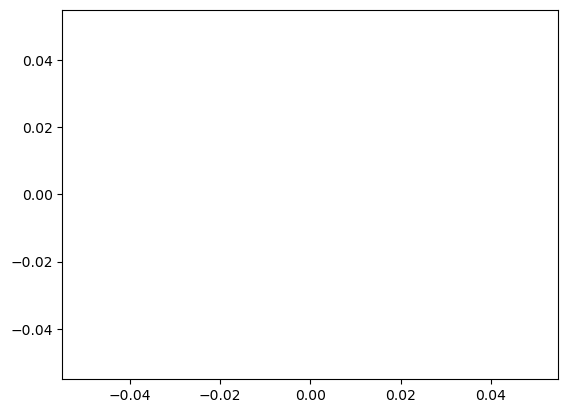

In [2]:
# With the semi-colon
plt.plot();

# You could use plt.show() if you want
# plt.plot()
# plt.show()

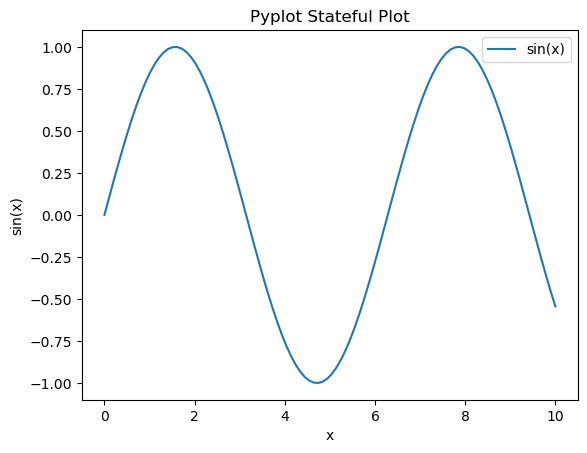

In [3]:
# First method - pyplot API
x = np.linspace(0, 10, 100)
y = np.sin(x)

plt.plot(x, y, label='sin(x)')
plt.xlabel('x')
plt.ylabel('sin(x)')
plt.title('Pyplot Stateful Plot')
plt.legend()
plt.show()

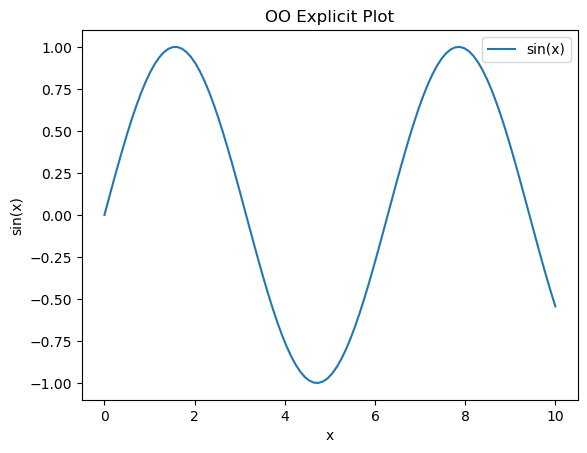

In [4]:
# Second method: Object-oriented API - recommended method!
x = np.linspace(0, 10, 100)
y = np.sin(x)

fig, ax = plt.subplots()
ax.plot(x, y, label='sin(x)')
ax.set_xlabel('x')
ax.set_ylabel('sin(x)')
ax.set_title('OO Explicit Plot')
ax.legend()
plt.show()

In [5]:
# This is where the object orientated name comes from 
type(fig), type(ax)

(matplotlib.figure.Figure, matplotlib.axes._axes.Axes)

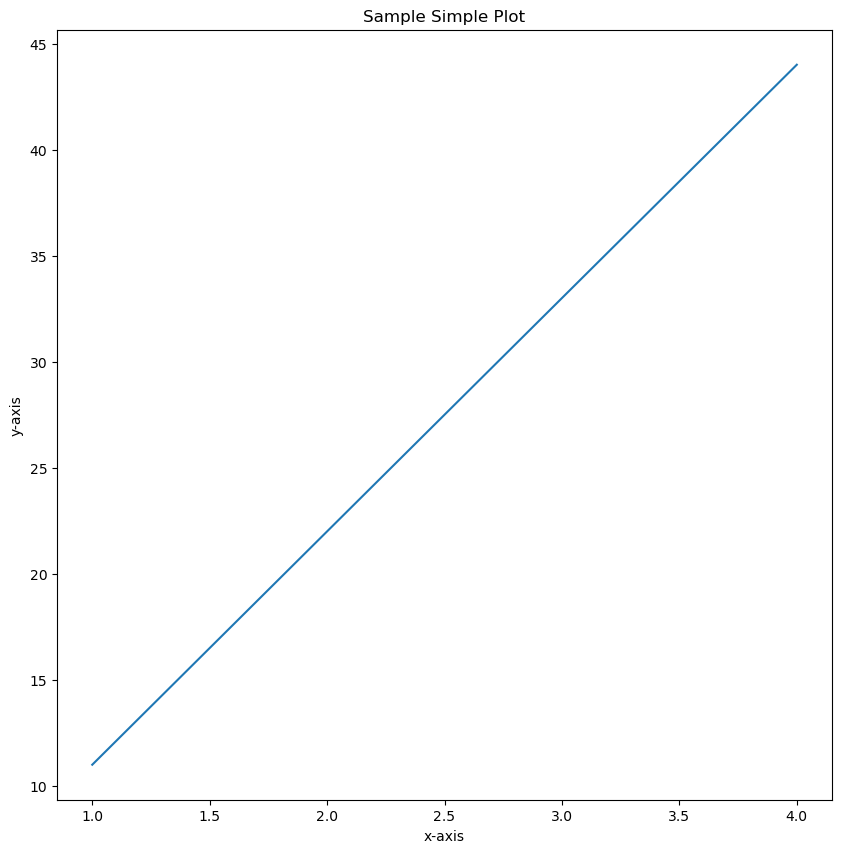

In [6]:
# A matplotlib workflow

# 0. Import and get matplotlib ready
# %matplotlib inline
import matplotlib.pyplot as plt

# 1. Prepare data
x = [1, 2, 3, 4]
y = [11, 22, 33, 44]

# 2. Setup plot
fig, ax = plt.subplots(figsize=(10,10))

# 3. Plot data
ax.plot(x, y)

# 4. Customize plot
ax.set(title="Sample Simple Plot", xlabel="x-axis", ylabel="y-axis")

# 5. Save & show
fig.savefig("./images/simple-plot.png")

## Making the most common type of plots using NumPy arrays

In [7]:
# Create an array
x = np.linspace(0, 10, 100)
x[:10]

array([0.        , 0.1010101 , 0.2020202 , 0.3030303 , 0.4040404 ,
       0.50505051, 0.60606061, 0.70707071, 0.80808081, 0.90909091])

### Line

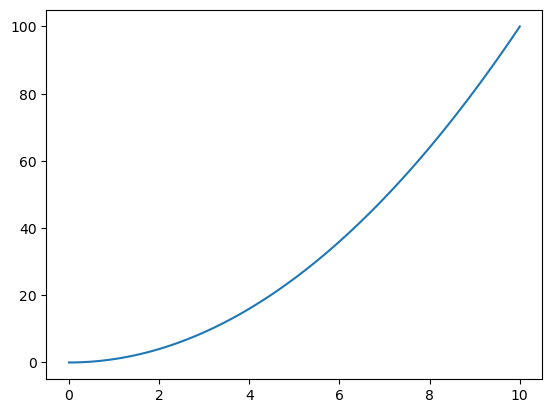

In [8]:
# The default plot is line
fig, ax = plt.subplots()
ax.plot(x, x**2);

### Scatter

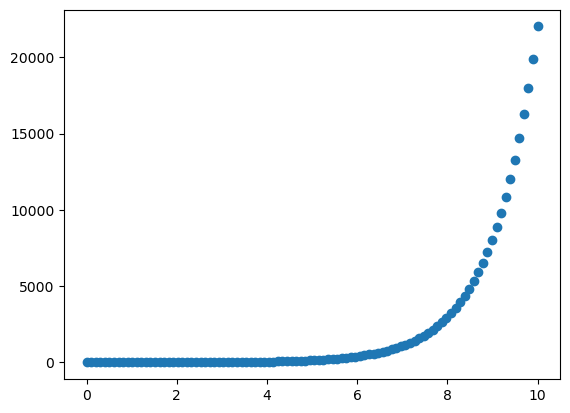

In [9]:
# Need to recreate our figure and axis instances when we want a new figure
fig, ax = plt.subplots()
ax.scatter(x, np.exp(x));

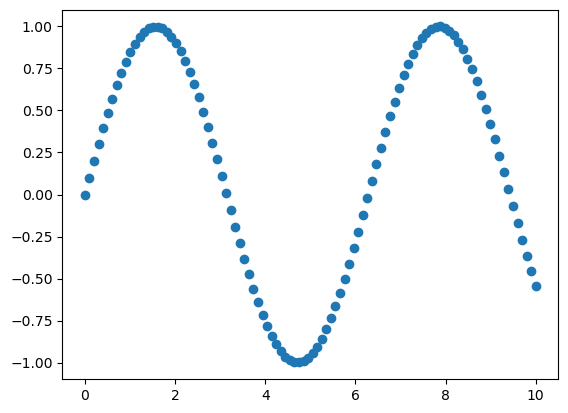

In [10]:
fig, ax = plt.subplots()
ax.scatter(x, np.sin(x));

### Bar

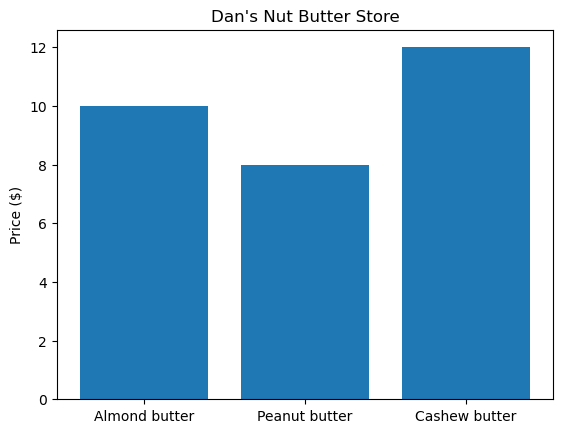

In [11]:
# You can make plots from a dictionary
nut_butter_prices = {"Almond butter": 10,
                     "Peanut butter": 8,
                     "Cashew butter": 12}
fig, ax = plt.subplots()
ax.bar(nut_butter_prices.keys(), nut_butter_prices.values())
ax.set(title="Dan's Nut Butter Store", ylabel="Price ($)");

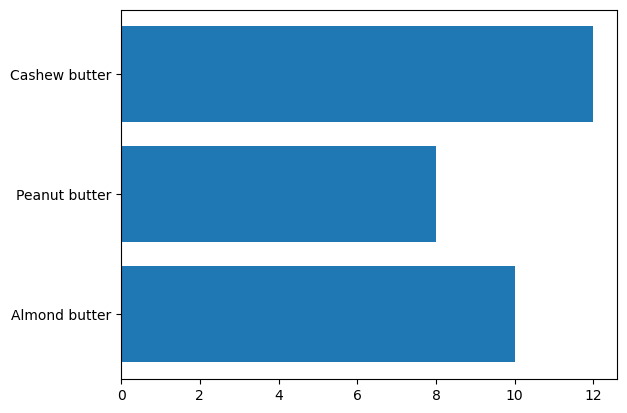

In [12]:
fig, ax = plt.subplots()
ax.barh(list(nut_butter_prices.keys()), list(nut_butter_prices.values()));

### Histogram (hist)

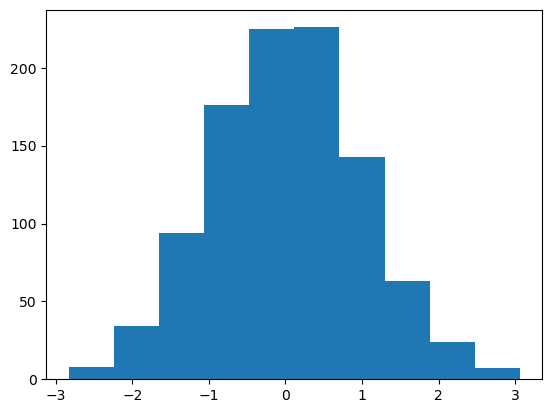

In [13]:
# Make some data from a normal distribution
x = np.random.randn(1000) # pulls data from a normal distribution

fig, ax = plt.subplots()
ax.hist(x);

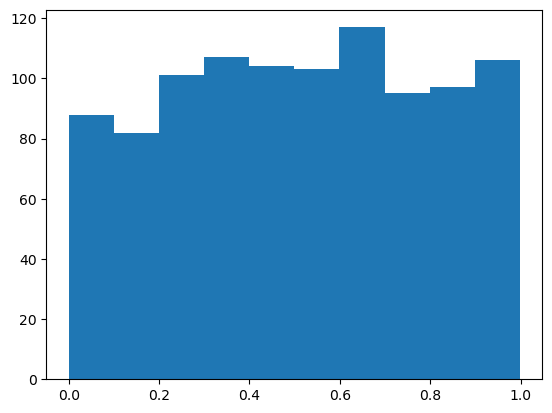

In [14]:
x = np.random.random(1000) # random data from random distribution

fig, ax = plt.subplots()
ax.hist(x);

### Subplots

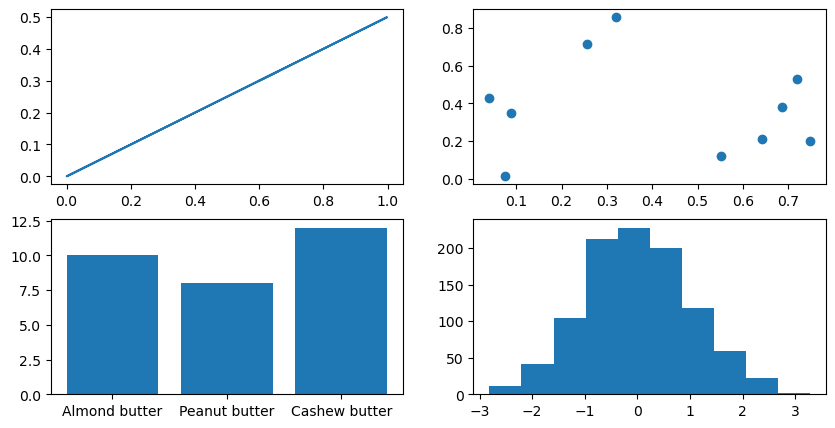

In [15]:
# Option 1: Create multiple subplots
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(nrows=2, 
                                             ncols=2, 
                                             figsize=(10, 5))

# Plot data to each axis
ax1.plot(x, x/2);
ax2.scatter(np.random.random(10), np.random.random(10));
ax3.bar(nut_butter_prices.keys(), nut_butter_prices.values());
ax4.hist(np.random.randn(1000));

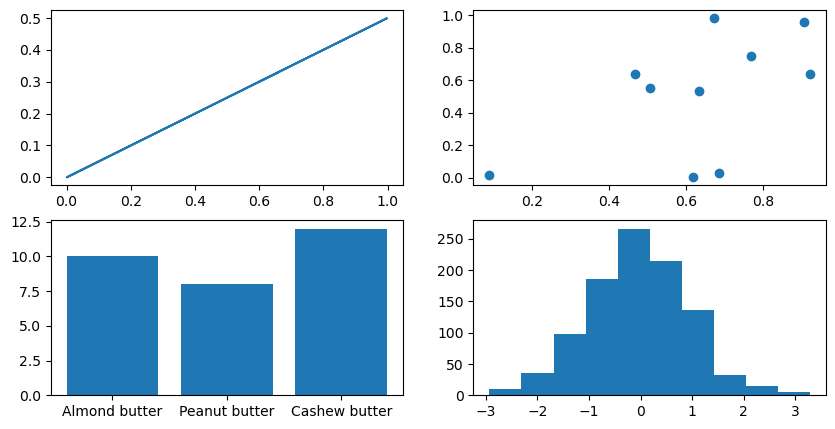

In [16]:
# Option 2: Create multiple subplots
fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(10, 5))

# Index to plot data
ax[0, 0].plot(x, x/2);
ax[0, 1].scatter(np.random.random(10), np.random.random(10));
ax[1, 0].bar(nut_butter_prices.keys(), nut_butter_prices.values());
ax[1, 1].hist(np.random.randn(1000));

## Plotting data directly with pandas

In [17]:
# Let's import the car_sales dataset
car_sales = pd.read_csv("./car-sales.csv")
car_sales

,Make,Colour,Odometer (KM),Doors,Price
0,Toyota,White,150043,4,"$4,000.00"
1,Honda,Red,87899,4,"$5,000.00"
2,Toyota,Blue,32549,3,"$7,000.00"
3,BMW,Black,11179,5,"$22,000.00"
4,Nissan,White,213095,4,"$3,500.00"
5,Toyota,Green,99213,4,"$4,500.00"
6,Honda,Blue,45698,4,"$7,500.00"
7,Honda,Blue,54738,4,"$7,000.00"
8,Toyota,White,60000,4,"$6,250.00"
9,Nissan,White,31600,4,"$9,700.00"


In [18]:
# Start with some dummy data
ts = pd.Series(np.random.randn(1000),
               index=pd.date_range('1/1/2020', periods=1000))
ts

2020-01-01    1.363884
2020-01-02   -1.061412
2020-01-03    0.250760
2020-01-04   -0.179540
2020-01-05    1.258734
                ...   
2022-09-22    2.212586
2022-09-23   -0.260346
2022-09-24   -0.110927
2022-09-25    1.505242
2022-09-26    0.574325
Freq: D, Length: 1000, dtype: float64

In [19]:
ts.cumsum()

2020-01-01    1.363884
2020-01-02    0.302473
2020-01-03    0.553233
2020-01-04    0.373693
2020-01-05    1.632427
                ...   
2022-09-22   -8.504959
2022-09-23   -8.765305
2022-09-24   -8.876232
2022-09-25   -7.370990
2022-09-26   -6.796665
Freq: D, Length: 1000, dtype: float64

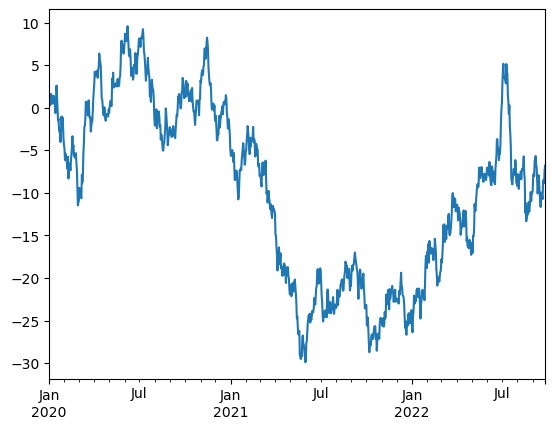

In [20]:
ts.cumsum().plot();

### Working with actual data

In [21]:
# Remove price column symbols
car_sales["Price"] = car_sales["Price"].str.replace(r'[^\d,.]', '', regex=True)
car_sales["Price"] = car_sales["Price"].str.replace(',', '', regex=False)
car_sales["Price"] = pd.to_numeric(car_sales["Price"]).astype(int)
car_sales

,Make,Colour,Odometer (KM),Doors,Price
0,Toyota,White,150043,4,4000
1,Honda,Red,87899,4,5000
2,Toyota,Blue,32549,3,7000
3,BMW,Black,11179,5,22000
4,Nissan,White,213095,4,3500
5,Toyota,Green,99213,4,4500
6,Honda,Blue,45698,4,7500
7,Honda,Blue,54738,4,7000
8,Toyota,White,60000,4,6250
9,Nissan,White,31600,4,9700


In [22]:
# Add a date column
car_sales["Sale Date"] = pd.date_range("1/1/2020", periods=len(car_sales))
car_sales

,Make,Colour,Odometer (KM),Doors,Price,Sale Date
0,Toyota,White,150043,4,4000,2020-01-01
1,Honda,Red,87899,4,5000,2020-01-02
2,Toyota,Blue,32549,3,7000,2020-01-03
3,BMW,Black,11179,5,22000,2020-01-04
4,Nissan,White,213095,4,3500,2020-01-05
5,Toyota,Green,99213,4,4500,2020-01-06
6,Honda,Blue,45698,4,7500,2020-01-07
7,Honda,Blue,54738,4,7000,2020-01-08
8,Toyota,White,60000,4,6250,2020-01-09
9,Nissan,White,31600,4,9700,2020-01-10


In [23]:
# Make total sales column (doesn't work, adds as string)
#car_sales["Total Sales"] = car_sales["Price"].cumsum()

# Oops... want them as int's not string
car_sales["Total Sales"] = car_sales["Price"].cumsum()
car_sales

,Make,Colour,Odometer (KM),Doors,Price,Sale Date,Total Sales
0,Toyota,White,150043,4,4000,2020-01-01,4000
1,Honda,Red,87899,4,5000,2020-01-02,9000
2,Toyota,Blue,32549,3,7000,2020-01-03,16000
3,BMW,Black,11179,5,22000,2020-01-04,38000
4,Nissan,White,213095,4,3500,2020-01-05,41500
5,Toyota,Green,99213,4,4500,2020-01-06,46000
6,Honda,Blue,45698,4,7500,2020-01-07,53500
7,Honda,Blue,54738,4,7000,2020-01-08,60500
8,Toyota,White,60000,4,6250,2020-01-09,66750
9,Nissan,White,31600,4,9700,2020-01-10,76450


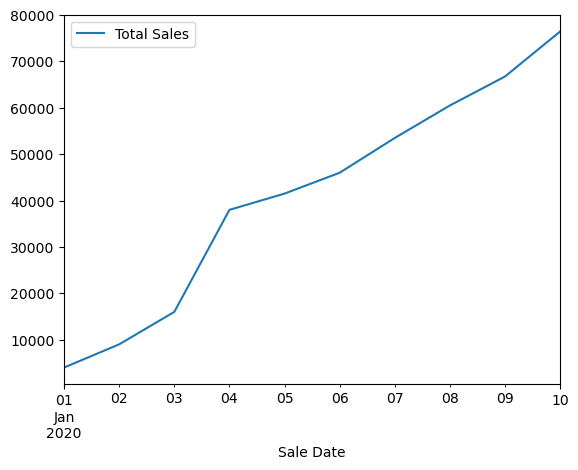

In [24]:
car_sales.plot(x='Sale Date', y='Total Sales');

### Scatter

<Axes: xlabel='Odometer (KM)', ylabel='Price'>

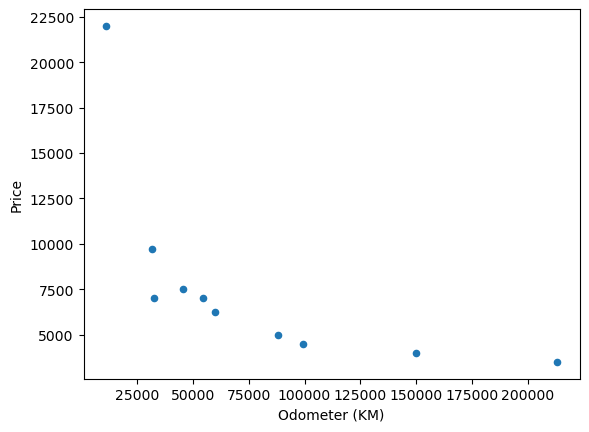

In [25]:
car_sales.plot(x="Odometer (KM)", y="Price", kind="scatter")

### Bar

In [26]:
x = np.random.rand(10, 5)
x

array([[0.46465024, 0.40101772, 0.07084918, 0.69292223, 0.87237121],
       [0.05889361, 0.50938929, 0.48122174, 0.72372359, 0.8583655 ],
       [0.4101751 , 0.80007045, 0.45332334, 0.9546957 , 0.72734349],
       [0.89750742, 0.02396683, 0.66588993, 0.72670025, 0.45178341],
       [0.0235793 , 0.85216734, 0.72047399, 0.13671435, 0.89869108],
       [0.03908945, 0.72467448, 0.07369607, 0.33272248, 0.91374333],
       [0.27155769, 0.58857909, 0.34602536, 0.66582429, 0.23887675],
       [0.55243918, 0.95692325, 0.39833649, 0.487856  , 0.38197574],
       [0.06982706, 0.26190144, 0.79145356, 0.74407394, 0.85773229],
       [0.30989852, 0.51581566, 0.78931046, 0.54361919, 0.4543813 ]])

In [27]:
df = pd.DataFrame(x, columns=['a', 'b', 'c', 'd', 'e'])
df

,a,b,c,d,e
0,0.464650,0.401018,0.070849,0.692922,0.872371
1,0.058894,0.509389,0.481222,0.723724,0.858365
2,0.410175,0.800070,0.453323,0.954696,0.727343
3,0.897507,0.023967,0.665890,0.726700,0.451783
4,0.023579,0.852167,0.720474,0.136714,0.898691
5,0.039089,0.724674,0.073696,0.332722,0.913743
6,0.271558,0.588579,0.346025,0.665824,0.238877
7,0.552439,0.956923,0.398336,0.487856,0.381976
8,0.069827,0.261901,0.791454,0.744074,0.857732
9,0.309899,0.515816,0.789310,0.543619,0.454381


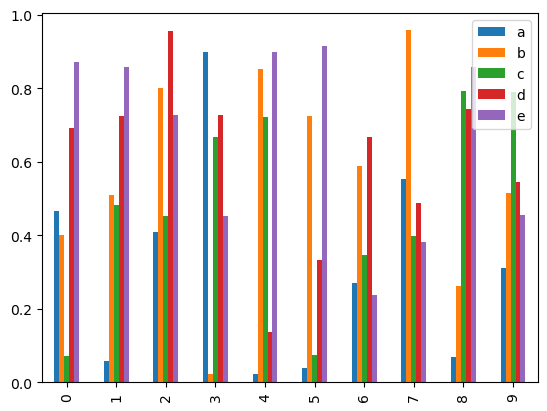

In [28]:
df.plot.bar();

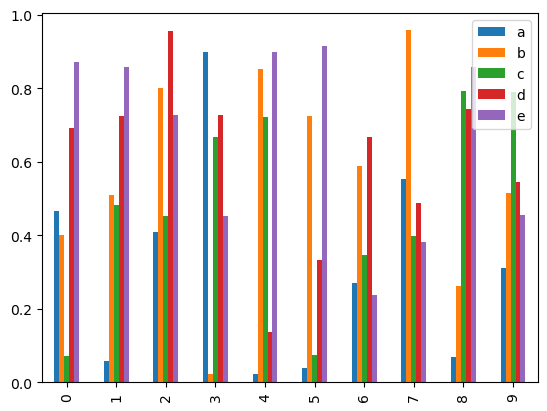

In [29]:
# Can do the same thing with 'kind' keyword
df.plot(kind='bar');

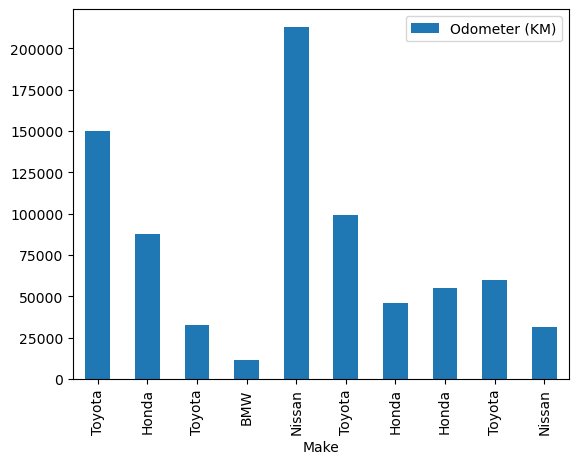

In [30]:
car_sales.plot(x='Make', y='Odometer (KM)', kind='bar');

### Histograms

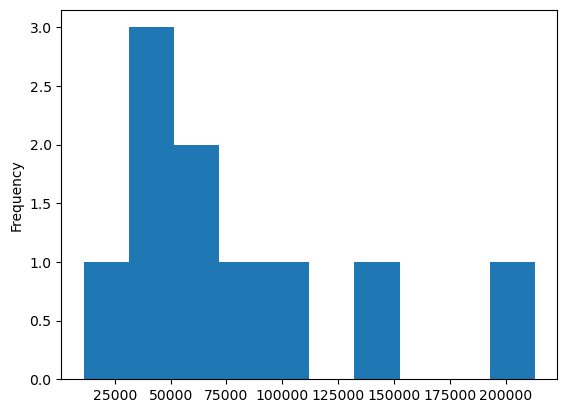

In [31]:
car_sales["Odometer (KM)"].plot.hist();

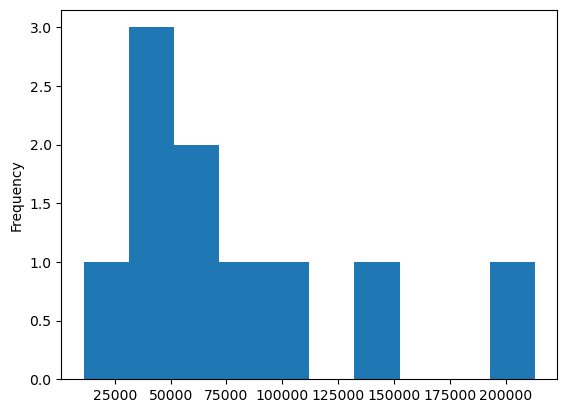

In [32]:
car_sales["Odometer (KM)"].plot(kind="hist");

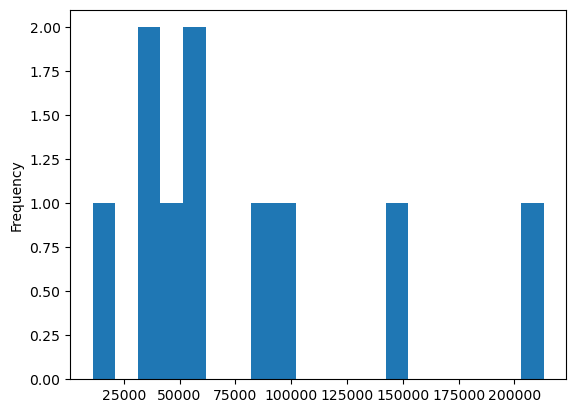

In [33]:
# Default number of bins is 10 
car_sales["Odometer (KM)"].plot.hist(bins=20);

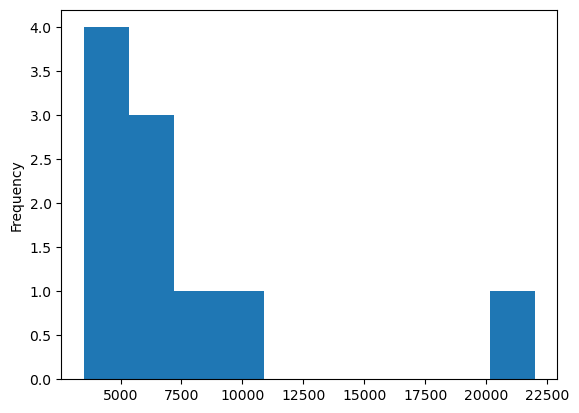

In [34]:
car_sales["Price"].plot.hist(bins=10);

In [35]:
heart_disease = pd.read_csv("./heart-disease.csv")
heart_disease.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


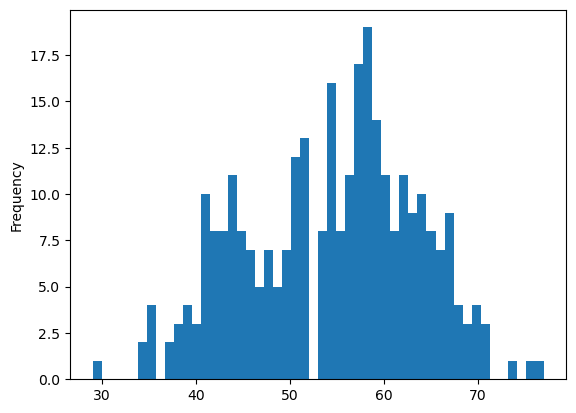

In [38]:
heart_disease["age"].plot.hist(bins=50);

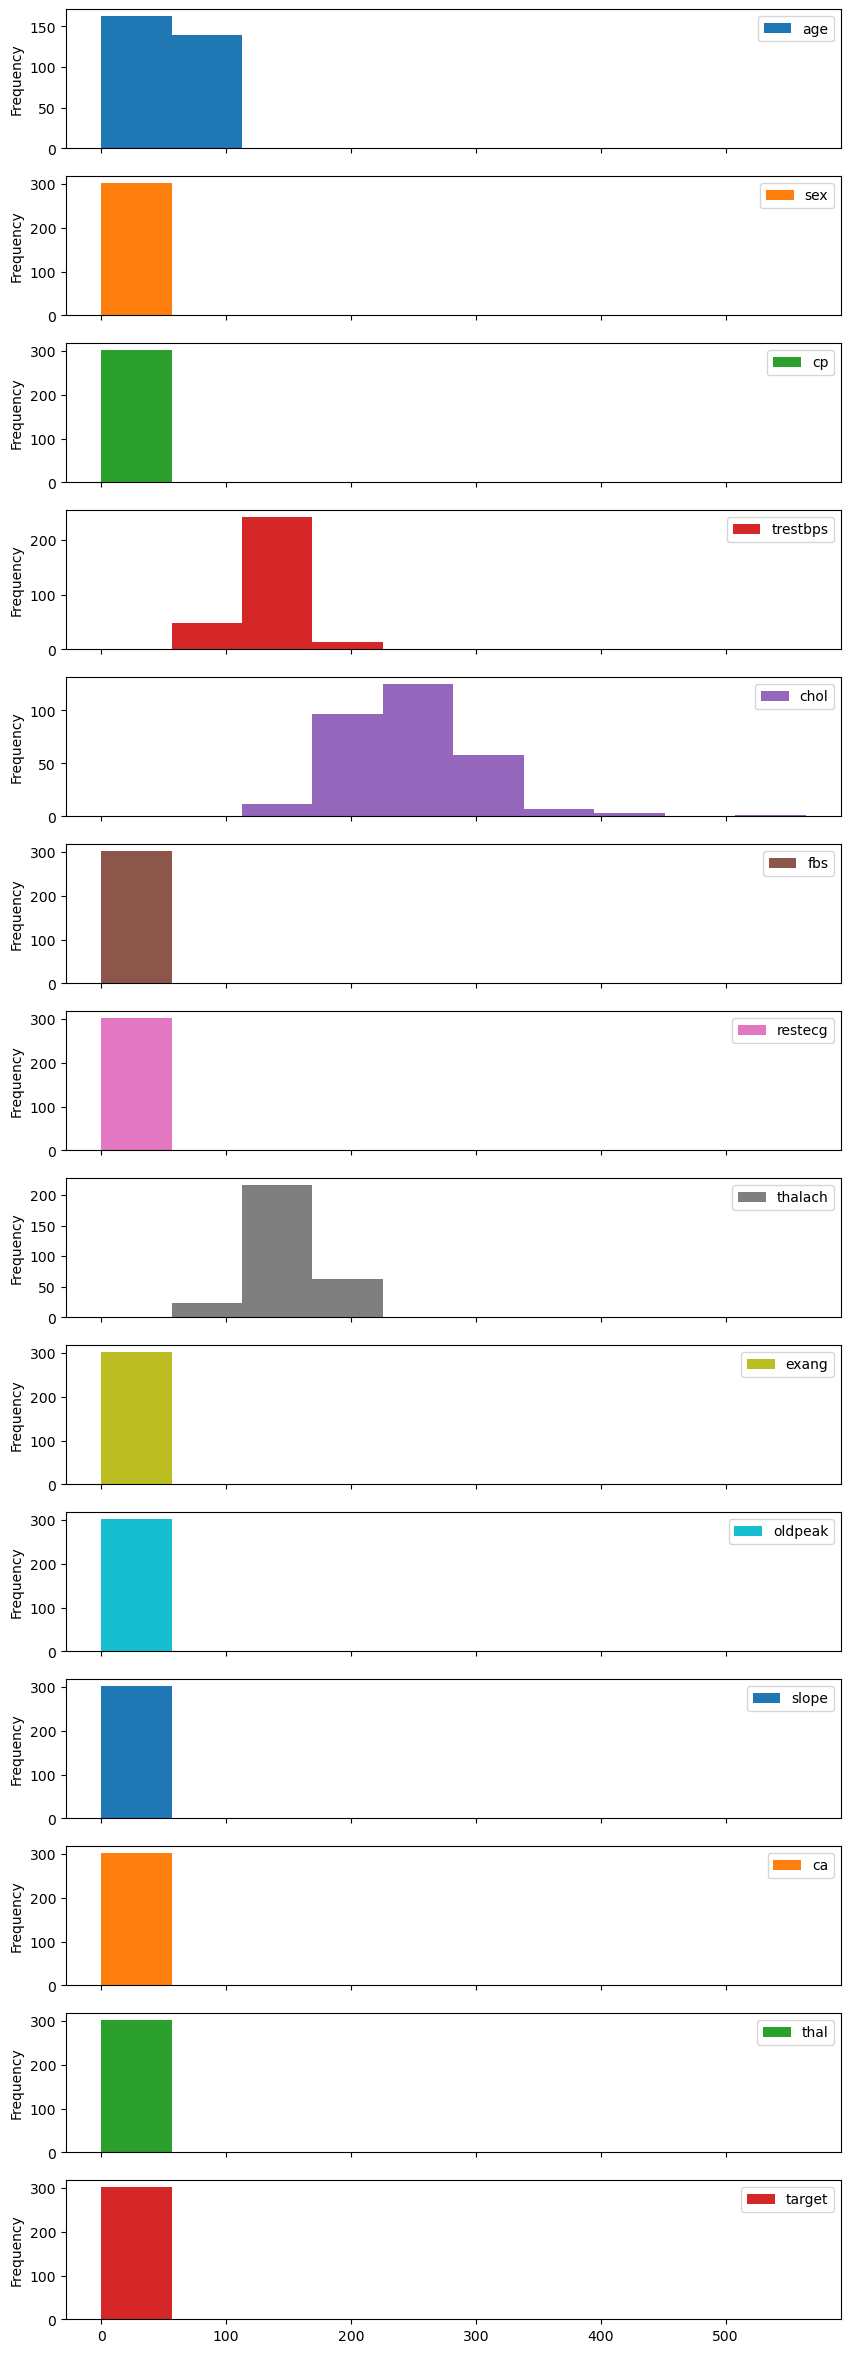

In [39]:
heart_disease.plot.hist(figsize=(10, 30), subplots=True);

## Plotting with pandas using the OO method

In [40]:
# Perform data analysis on patients over 50
over_50 = heart_disease[heart_disease["age"] > 50]
over_50

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
5,57,1,0,140,192,0,1,148,0,0.4,1,0,1,1
6,56,0,1,140,294,0,0,153,0,1.3,1,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
297,59,1,0,164,176,1,0,90,0,1.0,1,2,1,0
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


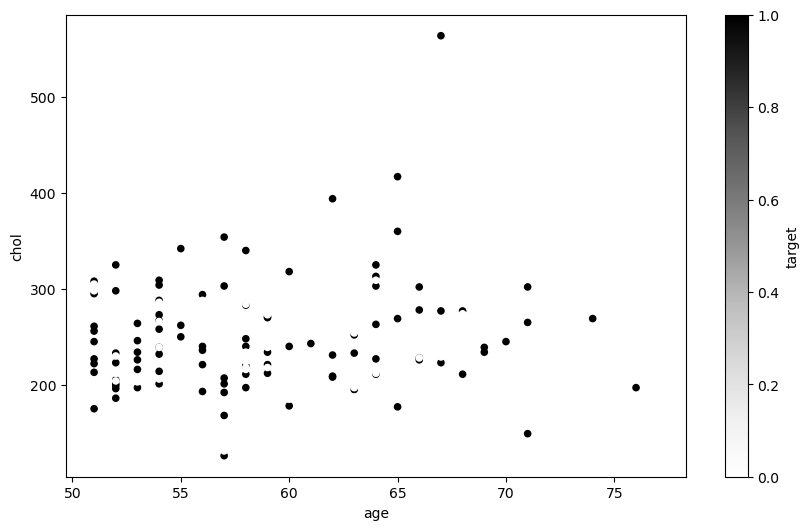

In [44]:
# Pyplot method
over_50.plot(kind='scatter', 
             x='age', 
             y='chol', 
             c='target', 
             figsize=(10, 6));

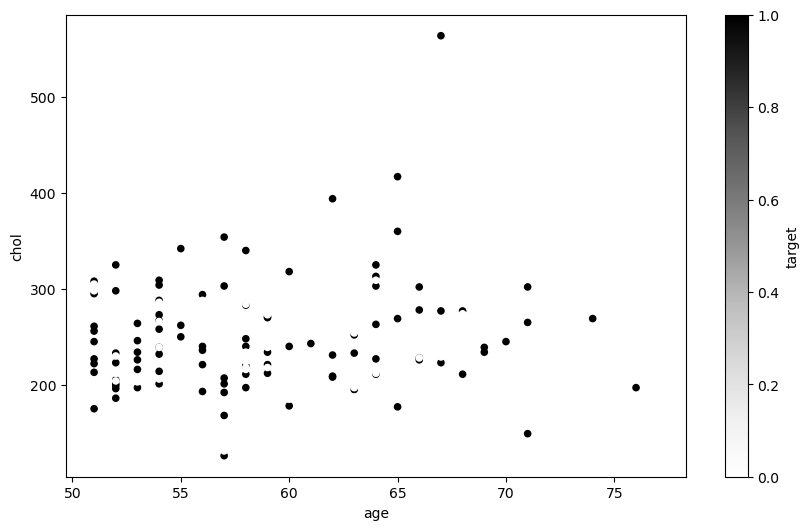

In [49]:
# OO method mixed with pyplot method
fig, ax = plt.subplots(figsize=(10, 6))
over_50.plot(kind='scatter', 
             x="age", 
             y="chol", 
             c='target', 
             ax=ax);
# ax.set_xlim([45, 100]);

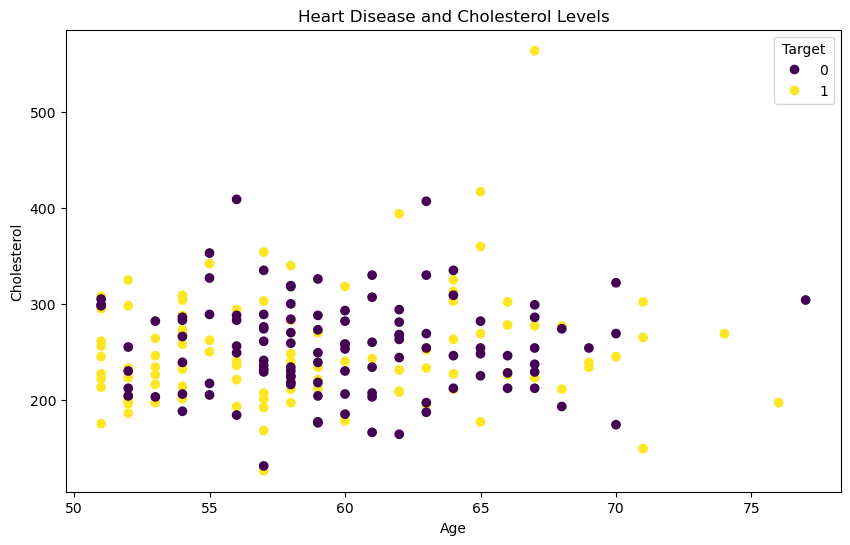

In [50]:
# OO method from scratch

# Create the plot
fig, ax = plt.subplots(figsize=(10, 6))

# Plot the data
scatter = ax.scatter(over_50["age"], 
                     over_50["chol"], 
                     c=over_50["target"])

# Customize the plot
ax.set(title="Heart Disease and Cholesterol Levels",
       xlabel="Age",
       ylabel="Cholesterol");
ax.legend(*scatter.legend_elements(), title="Target");

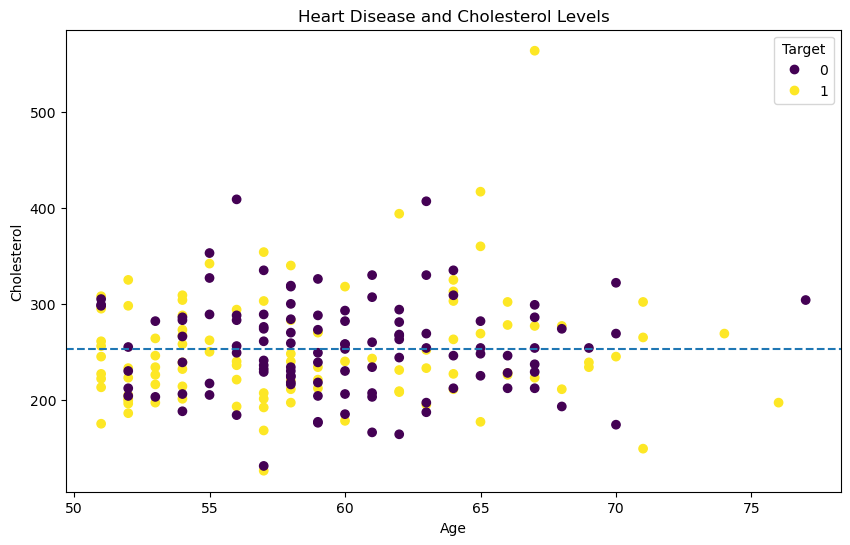

In [52]:
# Make a bit more of a complicated plot

# Create the plot
fig, ax = plt.subplots(figsize=(10, 6))

# Plot the data
scatter = ax.scatter(over_50["age"], 
                     over_50["chol"], 
                     c=over_50["target"])

# Customize the plot
ax.set(title="Heart Disease and Cholesterol Levels",
       xlabel="Age",
       ylabel="Cholesterol");
ax.legend(*scatter.legend_elements(), title="Target")

# Add a meanline
ax.axhline(over_50["chol"].mean(),
           linestyle="--");

## Adding another plot to existing styled one

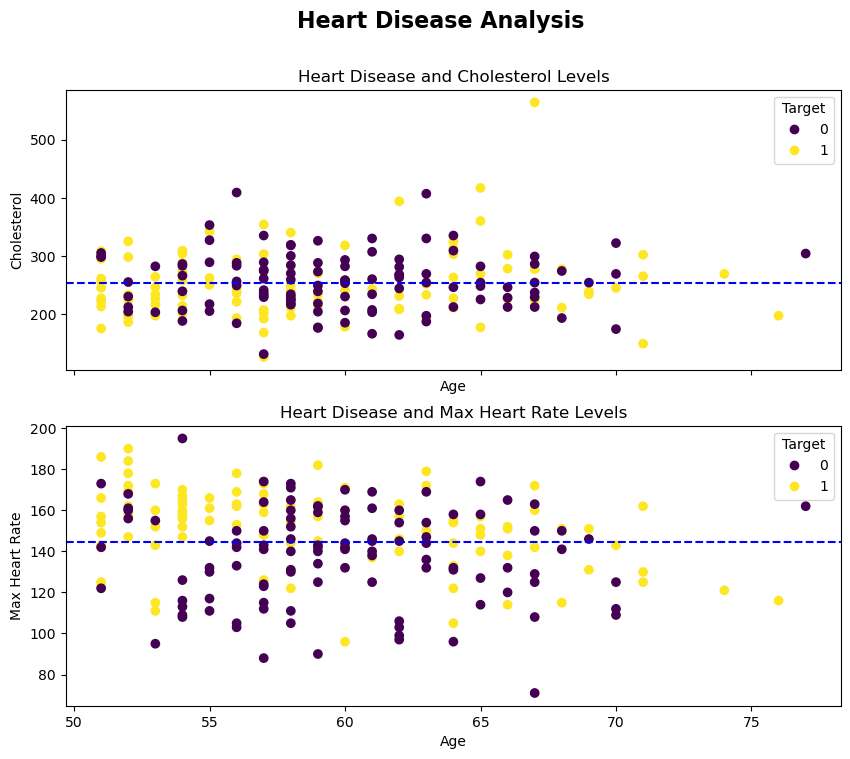

In [54]:
# Setup plot (2 rows, 1 column)
fig, (ax0, ax1) = plt.subplots(nrows=2, # 2 rows
                               ncols=1, 
                               sharex=True, 
                               figsize=(10, 8))

# Add data for ax0
scatter = ax0.scatter(over_50["age"], 
                      over_50["chol"], 
                      c=over_50["target"])
# Customize ax0
ax0.set(title="Heart Disease and Cholesterol Levels",
         xlabel="Age",
        ylabel="Cholesterol")
ax0.legend(*scatter.legend_elements(), title="Target")

# Setup a mean line
ax0.axhline(y=over_50["chol"].mean(), 
            color='b', 
            linestyle='--', 
            label="Average")


# Add data for ax1
scatter = ax1.scatter(over_50["age"], 
                      over_50["thalach"], 
                      c=over_50["target"])

# Customize ax1
ax1.set(title="Heart Disease and Max Heart Rate Levels",
        xlabel="Age",
        ylabel="Max Heart Rate")
ax1.legend(*scatter.legend_elements(), title="Target")

# Setup a mean line
ax1.axhline(y=over_50["thalach"].mean(), 
            color='b', 
            linestyle='--', 
            label="Average")

# Title the figure
fig.suptitle('Heart Disease Analysis', fontsize=16, fontweight='bold');

## Customizing plots

In [55]:
plt.style.available

['Solarize_Light2',
 '_classic_test_patch',
 '_mpl-gallery',
 '_mpl-gallery-nogrid',
 'bmh',
 'classic',
 'dark_background',
 'fast',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'petroff10',
 'seaborn-v0_8',
 'seaborn-v0_8-bright',
 'seaborn-v0_8-colorblind',
 'seaborn-v0_8-dark',
 'seaborn-v0_8-dark-palette',
 'seaborn-v0_8-darkgrid',
 'seaborn-v0_8-deep',
 'seaborn-v0_8-muted',
 'seaborn-v0_8-notebook',
 'seaborn-v0_8-paper',
 'seaborn-v0_8-pastel',
 'seaborn-v0_8-poster',
 'seaborn-v0_8-talk',
 'seaborn-v0_8-ticks',
 'seaborn-v0_8-white',
 'seaborn-v0_8-whitegrid',
 'tableau-colorblind10']

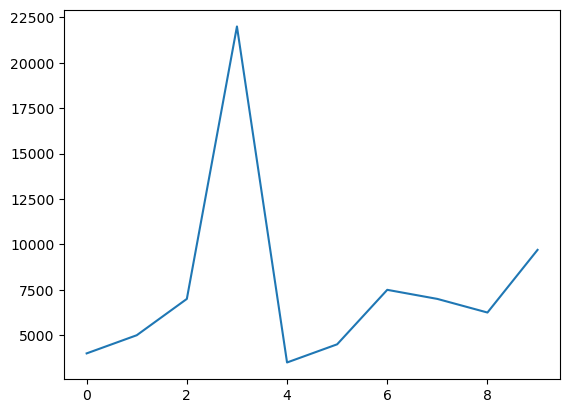

In [56]:
# Plot before changing style
car_sales["Price"].plot();

In [58]:
# Change the style... 
plt.style.use('seaborn-v0_8-whitegrid')

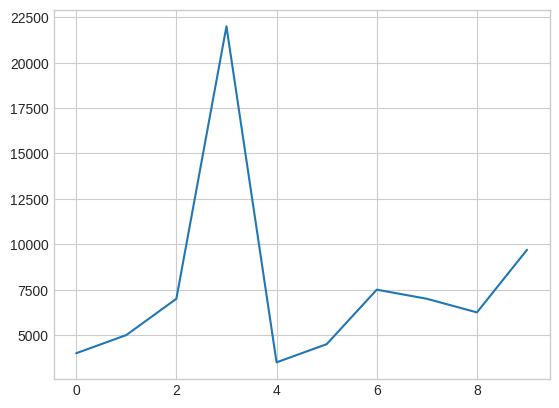

In [59]:
car_sales["Price"].plot();

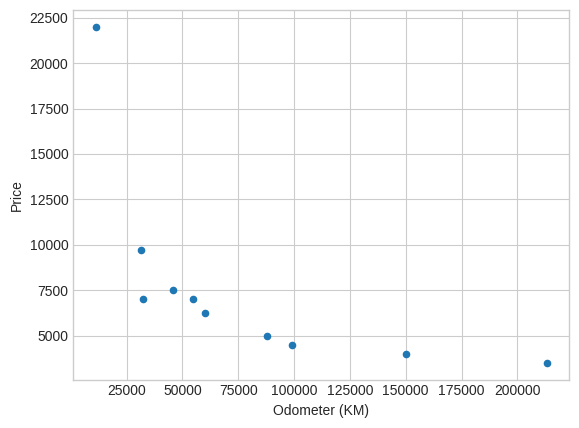

In [60]:
car_sales.plot(x="Odometer (KM)", y="Price", kind="scatter");

In [61]:
plt.style.use('ggplot')

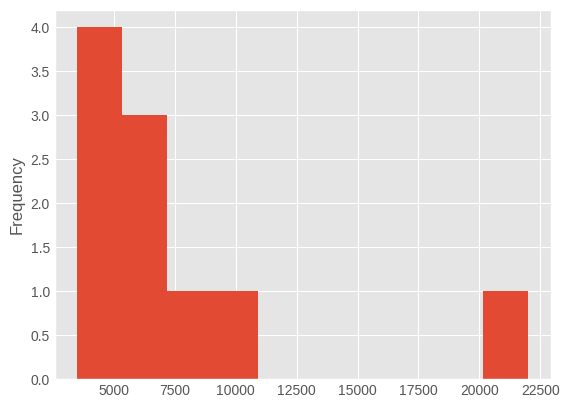

In [62]:
car_sales["Price"].plot.hist();

In [63]:
x = np.random.randn(10, 4)
x

array([[-1.52165875, -0.91950983, -1.00729568, -1.77250101],
       [ 0.05345616, -1.47042152,  0.30828867, -0.35224876],
       [-0.63505371, -0.68590011, -0.29730221, -0.47449163],
       [-1.33332124,  1.2189004 , -0.68527085,  1.80751103],
       [-1.69246322, -1.25494006, -0.12465171,  0.41833775],
       [-0.22765951,  1.21590538,  1.1396112 ,  0.31858929],
       [-1.07531577, -1.43910217,  0.19891446, -1.96452047],
       [ 0.8142996 ,  1.46014673, -0.72446588,  0.17056631],
       [ 0.71122659, -0.14249613, -0.49204471,  1.01334423],
       [ 0.29666423,  0.0861621 ,  2.40961813,  0.25189741]])

In [64]:
df = pd.DataFrame(x, columns=['a', 'b', 'c', 'd'])
df

,a,b,c,d
0,-1.521659,-0.919510,-1.007296,-1.772501
1,0.053456,-1.470422,0.308289,-0.352249
2,-0.635054,-0.685900,-0.297302,-0.474492
3,-1.333321,1.218900,-0.685271,1.807511
4,-1.692463,-1.254940,-0.124652,0.418338
5,-0.227660,1.215905,1.139611,0.318589
6,-1.075316,-1.439102,0.198914,-1.964520
7,0.814300,1.460147,-0.724466,0.170566
8,0.711227,-0.142496,-0.492045,1.013344
9,0.296664,0.086162,2.409618,0.251897


matplotlib.axes._axes.Axes

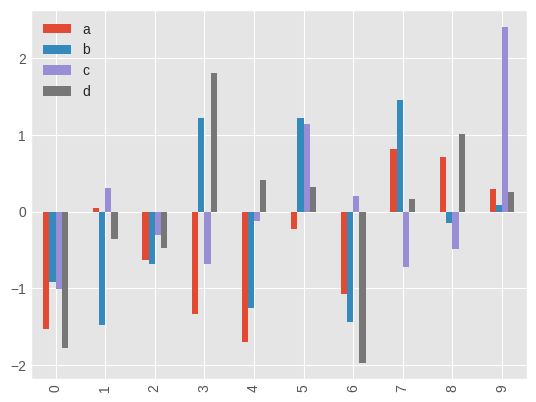

In [65]:
ax = df.plot(kind='bar')
type(ax)

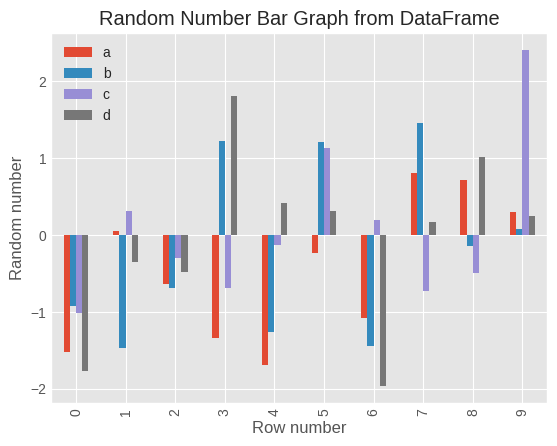

In [66]:
ax = df.plot(kind='bar')
ax.set(title="Random Number Bar Graph from DataFrame", 
       xlabel="Row number", 
       ylabel="Random number")
ax.legend().set_visible(True)

In [68]:
plt.style.use('seaborn-v0_8-whitegrid')

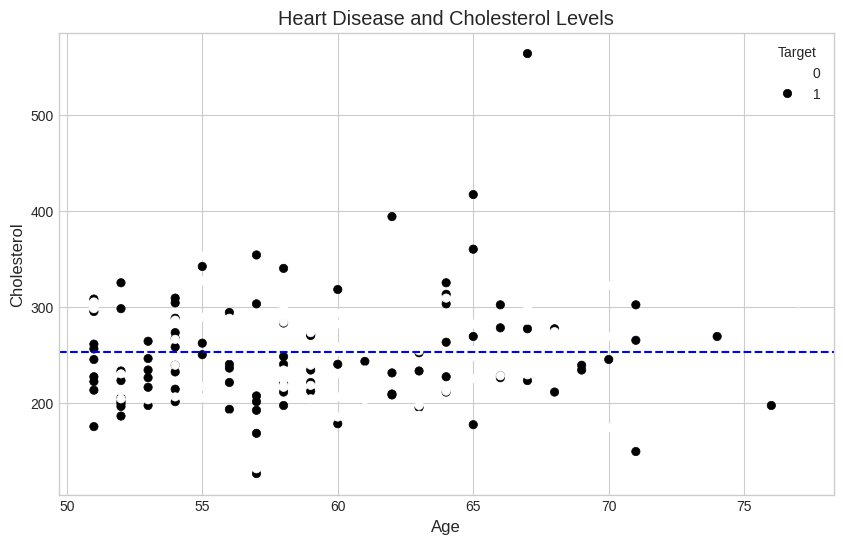

In [69]:
# No cmap change
fig, ax = plt.subplots(figsize=(10, 6))
scatter = ax.scatter(over_50["age"], 
                     over_50["chol"], 
                     c=over_50["target"])
ax.set(title="Heart Disease and Cholesterol Levels",
       xlabel="Age",
       ylabel="Cholesterol");
ax.axhline(y=over_50["chol"].mean(), 
           c='b', 
           linestyle='--', 
           label="Average");
ax.legend(*scatter.legend_elements(), title="Target")

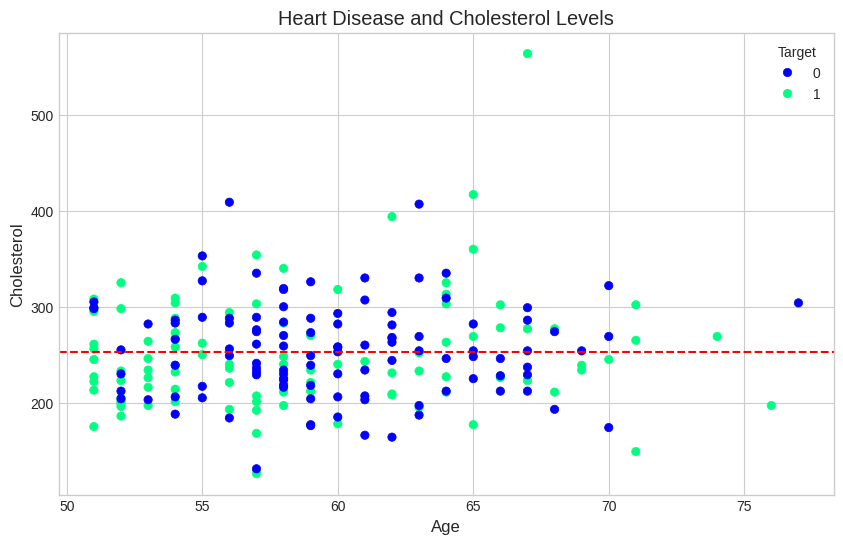

In [70]:
# Change cmap and horizontal line to be a different colour
fig, ax = plt.subplots(figsize=(10, 6))
scatter = ax.scatter(over_50["age"], 
                     over_50["chol"], 
                     c=over_50["target"], 
                     cmap="winter")
ax.set(title="Heart Disease and Cholesterol Levels",
       xlabel="Age",
       ylabel="Cholesterol")
ax.axhline(y=over_50["chol"].mean(), 
           color='r', 
           linestyle='--', 
           label="Average");
ax.legend(*scatter.legend_elements(), title="Target");

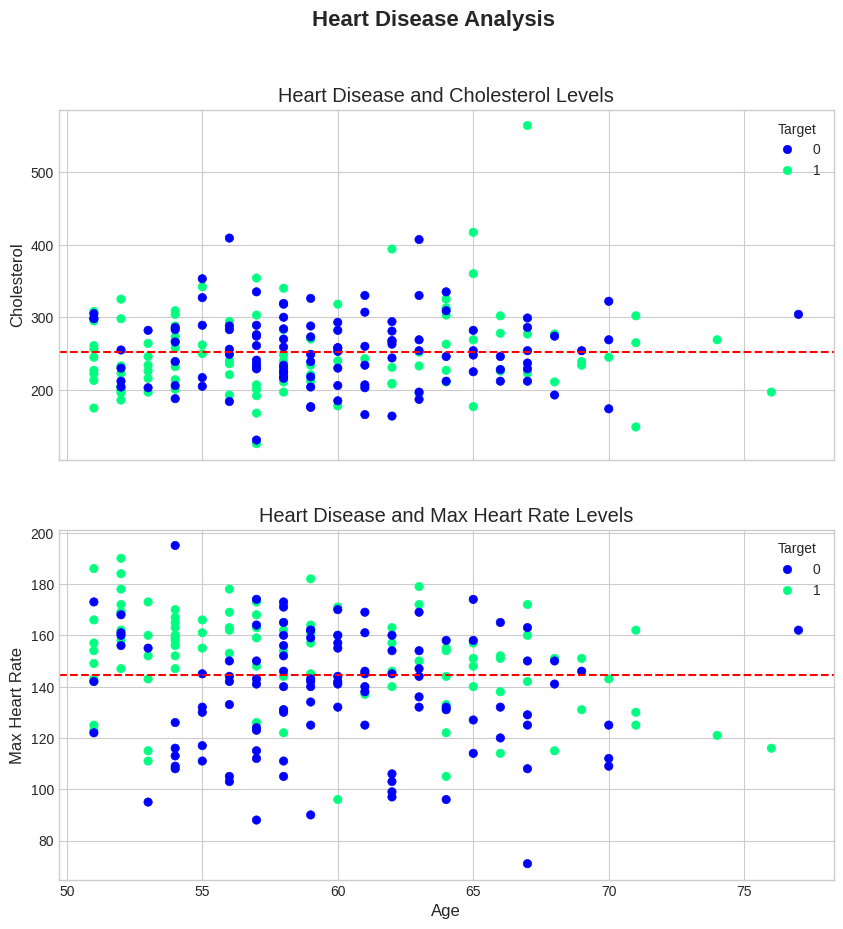

In [71]:
## Before the change (we've had color updates)

fig, (ax0, ax1) = plt.subplots(nrows=2, ncols=1, sharex=True, figsize=(10, 10))
scatter = ax0.scatter(over_50["age"], 
                      over_50["chol"], 
                      c=over_50["target"],
                      cmap='winter')
ax0.set(title="Heart Disease and Cholesterol Levels",
        ylabel="Cholesterol")

# Setup a mean line
ax0.axhline(y=over_50["chol"].mean(), 
            color='r', 
            linestyle='--', 
            label="Average");
ax0.legend(*scatter.legend_elements(), title="Target")

# Axis 1, 1 (row 1, column 1)
scatter = ax1.scatter(over_50["age"], 
                      over_50["thalach"], 
                      c=over_50["target"],
                      cmap='winter')
ax1.set(title="Heart Disease and Max Heart Rate Levels",
        xlabel="Age",
        ylabel="Max Heart Rate")

# Setup a mean line
ax1.axhline(y=over_50["thalach"].mean(), 
            color='r', 
            linestyle='--', 
            label="Average");
ax1.legend(*scatter.legend_elements(), title="Target")

# Title the figure
fig.suptitle('Heart Disease Analysis', fontsize=16, fontweight='bold');

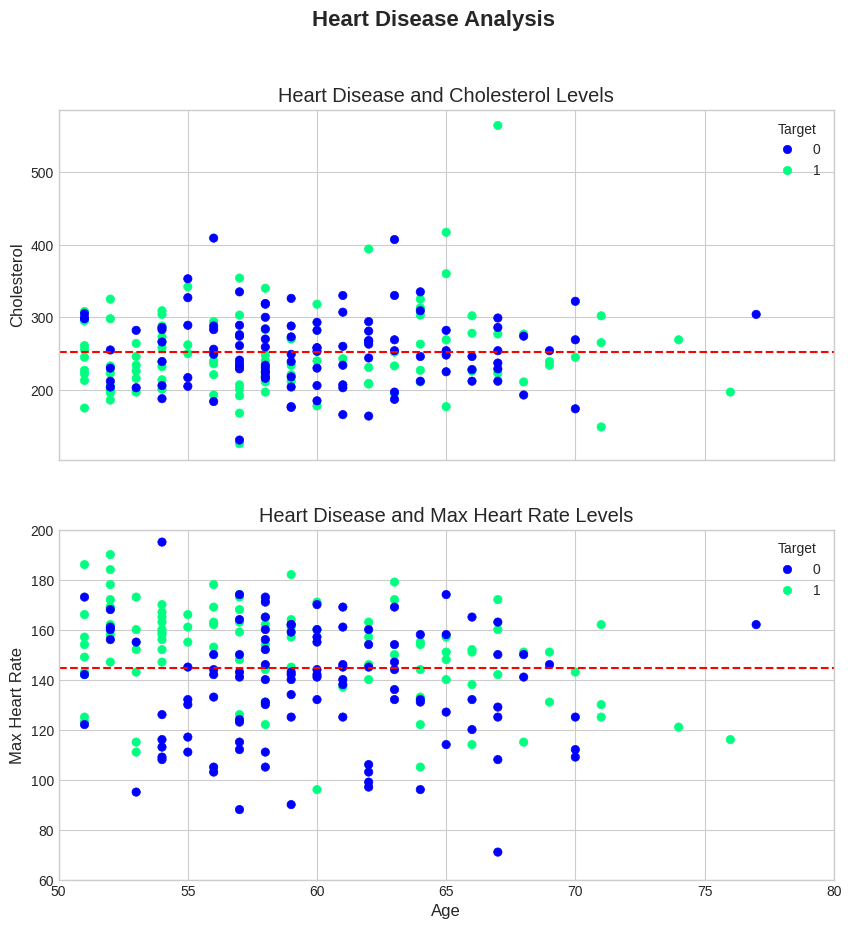

In [72]:
## After adding in different x & y limitations

fig, (ax0, ax1) = plt.subplots(nrows=2, ncols=1, sharex=True, figsize=(10, 10))
scatter = ax0.scatter(over_50["age"], 
                      over_50["chol"], 
                      c=over_50["target"],
                      cmap='winter')
ax0.set(title="Heart Disease and Cholesterol Levels",
        ylabel="Cholesterol")

# Set the x axis
ax0.set_xlim([50, 80])

# Setup a mean line
ax0.axhline(y=over_50["chol"].mean(), 
            color='r', 
            linestyle='--', 
            label="Average");
ax0.legend(*scatter.legend_elements(), title="Target")

# Axis 1, 1 (row 1, column 1)
scatter = ax1.scatter(over_50["age"], 
                      over_50["thalach"], 
                      c=over_50["target"],
                      cmap='winter')
ax1.set(title="Heart Disease and Max Heart Rate Levels",
        xlabel="Age",
        ylabel="Max Heart Rate")

# Set the y axis
ax1.set_ylim([60, 200])

# Setup a mean line
ax1.axhline(y=over_50["thalach"].mean(), 
            color='r', 
            linestyle='--', 
            label="Average");
ax1.legend(*scatter.legend_elements(), title="Target")

# Title the figure
fig.suptitle('Heart Disease Analysis', fontsize=16, fontweight='bold');

## Saving plots

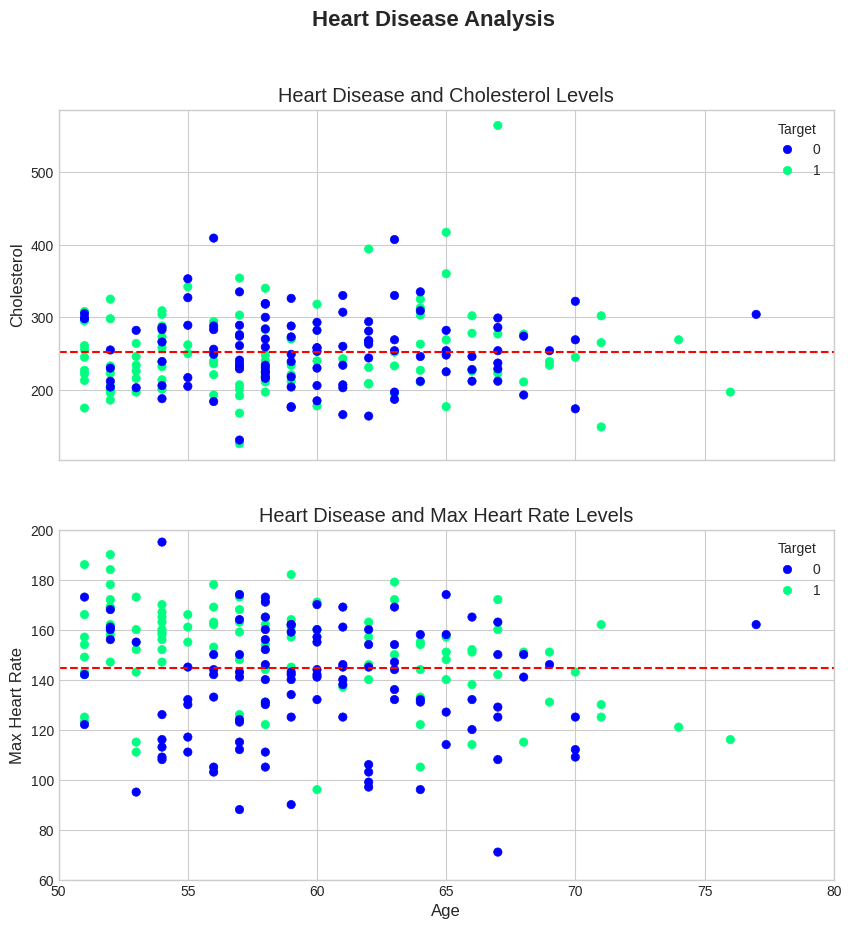

In [73]:
# Axis 0, 1 (row 0, column 0)
fig, (ax0, ax1) = plt.subplots(nrows=2, ncols=1, sharex=True, figsize=(10, 10))
scatter = ax0.scatter(over_50["age"], 
                      over_50["chol"], 
                      c=over_50["target"],
                      cmap='winter')
ax0.set(title="Heart Disease and Cholesterol Levels",
        ylabel="Cholesterol")

# Set the x axis
ax0.set_xlim([50, 80])

# Setup a mean line
ax0.axhline(y=over_50["chol"].mean(), 
            color='r', 
            linestyle='--', 
            label="Average");
ax0.legend(*scatter.legend_elements(), title="Target")

# Axis 1, 1 (row 1, column 1)
scatter = ax1.scatter(over_50["age"], 
                      over_50["thalach"], 
                      c=over_50["target"],
                      cmap='winter')
ax1.set(title="Heart Disease and Max Heart Rate Levels",
        xlabel="Age",
        ylabel="Max Heart Rate")

# Set the y axis
ax1.set_ylim([60, 200])

# Setup a mean line
ax1.axhline(y=over_50["thalach"].mean(), 
            color='r', 
            linestyle='--', 
            label="Average");
ax1.legend(*scatter.legend_elements(), title="Target")

# Title the figure
fig.suptitle('Heart Disease Analysis', fontsize=16, fontweight='bold');

In [74]:
# Check the supported filetypes
fig.canvas.get_supported_filetypes()

{'eps': 'Encapsulated Postscript',
 'jpg': 'Joint Photographic Experts Group',
 'jpeg': 'Joint Photographic Experts Group',
 'pdf': 'Portable Document Format',
 'pgf': 'PGF code for LaTeX',
 'png': 'Portable Network Graphics',
 'ps': 'Postscript',
 'raw': 'Raw RGBA bitmap',
 'rgba': 'Raw RGBA bitmap',
 'svg': 'Scalable Vector Graphics',
 'svgz': 'Scalable Vector Graphics',
 'tif': 'Tagged Image File Format',
 'tiff': 'Tagged Image File Format',
 'webp': 'WebP Image Format'}

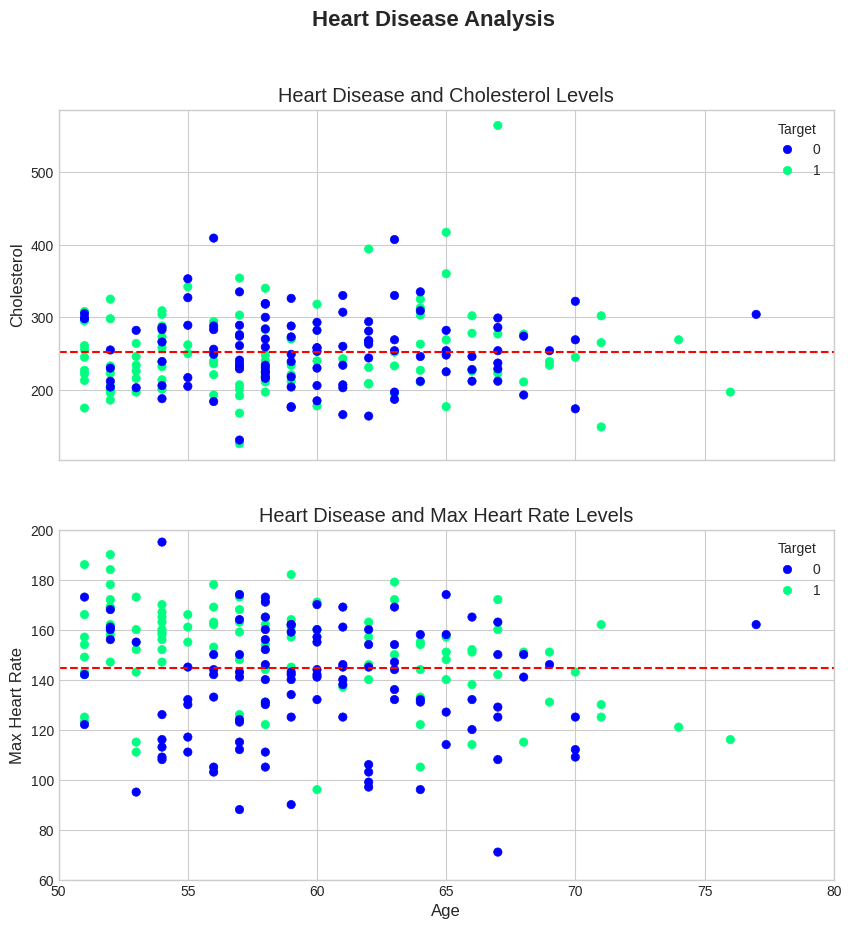

In [75]:
fig

In [77]:
# Save the file
fig.savefig("./images/heart-disease-analysis.png")

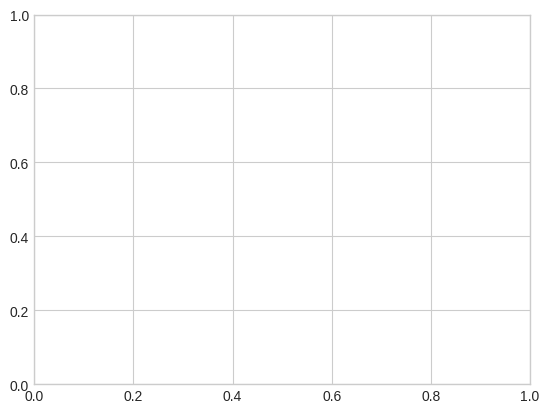

In [78]:
# Resets figure
fig, ax = plt.subplots()

In [79]:
# Potential function

def plotting_workflow(data):
    # 1. Manipulate data
    
    # 2. Create plot
    
    # 3. Plot data
    
    # 4. Customize plot
    
    # 5. Save plot
    
    # 6. Return plot
    
    return plot
